# **Thư viện**

In [195]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sbn
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import fbeta_score, make_scorer
from matplotlib.ticker import PercentFormatter


# **Dữ liệu**

In [196]:
df = pd.read_excel('train.xlsx')
df

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,no,2.2,no,1,no,7,0.6,188,...,20.0,756,2549,9,7,19,no,no,yes,1
1,1,1021,yes,0.5,yes,0,yes,53,0.7,136,...,905.0,1988,2631,17,3,7,yes,yes,no,2
2,2,563,yes,0.5,yes,2,yes,41,0.9,145,...,1263.0,1716,2603,11,2,9,yes,yes,no,2
3,3,615,yes,2.5,no,0,no,10,0.8,131,...,1216.0,1786,2769,16,8,11,yes,no,no,2
4,4,1821,yes,1.2,no,13,yes,44,0.6,141,...,1208.0,1212,1411,8,2,15,yes,yes,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,794,yes,0.5,yes,0,yes,2,0.8,106,...,1222.0,1890,668,13,4,19,yes,yes,no,0
1996,1996,1965,yes,2.6,yes,0,no,39,0.2,187,...,915.0,1965,2032,11,10,16,yes,yes,yes,2
1997,1997,1911,no,0.9,yes,1,yes,36,0.7,108,...,868.0,1632,3057,9,1,5,yes,yes,no,3
1998,1998,1512,no,0.9,no,4,yes,46,0.1,145,...,336.0,670,869,18,10,19,yes,yes,yes,0


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2000 non-null   int64  
 1   battery_power  2000 non-null   int64  
 2   blue           2000 non-null   object 
 3   clock_speed    1998 non-null   float64
 4   dual_sim       2000 non-null   object 
 5   fc             2000 non-null   int64  
 6   four_g         2000 non-null   object 
 7   int_memory     2000 non-null   int64  
 8   m_dep          1999 non-null   float64
 9   mobile_wt      2000 non-null   int64  
 10  n_cores        2000 non-null   int64  
 11  pc             1997 non-null   float64
 12  px_height      1999 non-null   float64
 13  px_width       2000 non-null   int64  
 14  ram            2000 non-null   int64  
 15  sc_h           2000 non-null   int64  
 16  sc_w           2000 non-null   int64  
 17  talk_time      2000 non-null   int64  
 18  three_g 

1. battery_power: Mức pin tối đa (mAh)
2. blue: Có bluetooth hay không
3. clock_speed: Tốc độ xung nhịp vi xử lí (GHz: Gigahertz)
4. dual_sim: Có hỗ trợ sim kép hay không
5. fc: độ phân giải camera trước (MP: megapixel)
6. four_g: có 4G hay không
7. int_memory: Dung lượng bộ nhớ trong (GB: gigabytes)
8. m_dep: Độ sâu (dày) của điện thoại (cm)
9. mobile_wt: khối lượng của điện thoại
10. n_cores: Số lượng core của bộ xử lý
11. pc: độ phân giải của camera chính (sau) (MP: megapixel)
12. px_height: Số pixel theo chiều dài màn hình
13. px_width: Số pixel theo chiều ngang màn hình
14. ram: dung lượng của RAM (MB: megabyte)
15. sc_h: chiều dài màn hình (cm)
16. sc_w: chiều rộng màn hình (cm)
17. talk_time: thời gian đàm thoại (tiếng)
18. three_g: có 3G hay không
19. touch_screen: điện thoại cảm ứng hay không
20. wifi: có wifi hay không
21. price_range: biến mục tiêu với các mức chi phí có giá trị 0 (thấp), 1 (trung bình), 2 (cao) và 3 (rất cao).

# **Tiền xử lý dữ liệu**

In [198]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [199]:
print('Tổng các giá trị null theo từng cột\n')
df.isnull().sum().sort_values()


Tổng các giá trị null theo từng cột



battery_power    0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
wifi             0
price_range      0
mobile_wt        0
int_memory       0
four_g           0
fc               0
dual_sim         0
blue             0
n_cores          0
px_height        1
m_dep            1
clock_speed      2
pc               3
dtype: int64

In [200]:
df = df.dropna(inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1993 non-null   int64  
 1   blue           1993 non-null   object 
 2   clock_speed    1993 non-null   float64
 3   dual_sim       1993 non-null   object 
 4   fc             1993 non-null   int64  
 5   four_g         1993 non-null   object 
 6   int_memory     1993 non-null   int64  
 7   m_dep          1993 non-null   float64
 8   mobile_wt      1993 non-null   int64  
 9   n_cores        1993 non-null   int64  
 10  pc             1993 non-null   float64
 11  px_height      1993 non-null   float64
 12  px_width       1993 non-null   int64  
 13  ram            1993 non-null   int64  
 14  sc_h           1993 non-null   int64  
 15  sc_w           1993 non-null   int64  
 16  talk_time      1993 non-null   int64  
 17  three_g        1993 non-null   object 
 18  touch_sc

In [201]:
df.duplicated().sum()

0

# **Data Visulization**

## Thể hiện tổng số

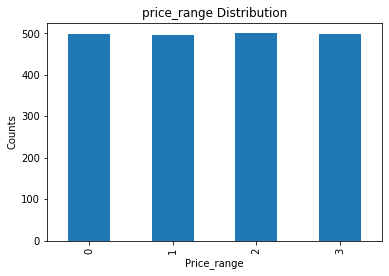

In [202]:
plt.title('price_range Distribution')
df['price_range'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Price_range')
plt.ylabel ('Counts')
plt.show()

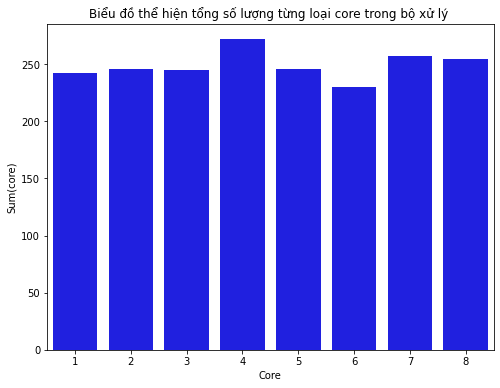

In [203]:
plt.figure(figsize=(8, 6))
sbn.countplot(df['n_cores'], color ='b')
plt.title('Biểu đồ thể hiện tổng số lượng từng loại core trong bộ xử lý ',fontsize = 12)
plt.xlabel('Core')
plt.ylabel('Sum(core)')
plt.show()

## Thể hiện tỷ lệ

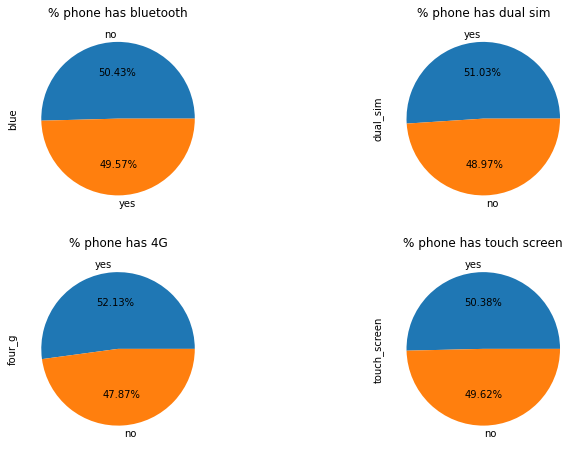

In [204]:
plt.subplot(3, 2, 1)
ax2 = df['blue'].value_counts().plot(kind = 'pie',figsize=(12,12),autopct='%1.2f%%')
ax2.set_title('% phone has bluetooth', fontsize = 12)

plt.subplot(3, 2, 2)
ax3 = df['dual_sim'].value_counts().plot(kind = 'pie',figsize=(12,12),autopct='%1.2f%%')
ax3.set_title('% phone has dual sim', fontsize = 12)

plt.subplot(3, 2, 3)
ax4 = df['four_g'].value_counts().plot(kind = 'pie',figsize=(12,12),autopct='%1.2f%%')
ax4.set_title('% phone has 4G', fontsize = 12)

plt.subplot(3, 2, 4)
ax5 = df['touch_screen'].value_counts().plot(kind = 'pie',figsize=(12,12),autopct='%1.2f%%')
ax5.set_title('% phone has touch screen', fontsize = 12)
plt.show()


## Thể hiện phân phối

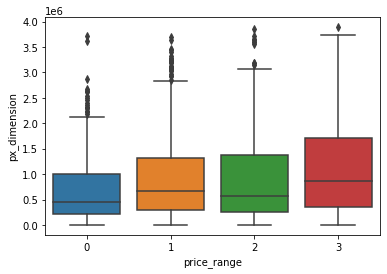

In [205]:
#Ta có kích thước của độ phân giải pixel = chiều cao * độ rộng
df["px_dimension"] = df["px_height"] * df["px_width"] 
sbn.boxplot(x = "price_range", y = "px_dimension", data = df)
plt.show()
#Có thể thấy rằng ở cả 4 mức độ, outlier đều xuất hiện khá nhiều (outlier của mức số 3 có 1 vài điểm ở 1 chấm -> không khá nhiều)

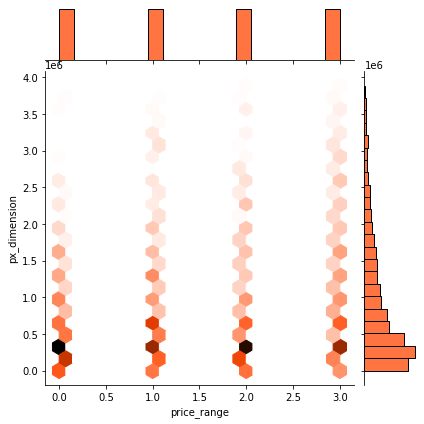

In [206]:
sbn.jointplot(x = "price_range", y = "px_dimension", data = df,kind ='hex',color ='orangered')
plt.show()
# Từ biểu đồ này thì nhóm em thấy được kích thước của độ phân giải không ảnh hưởng tới mức độ phạm vi giá

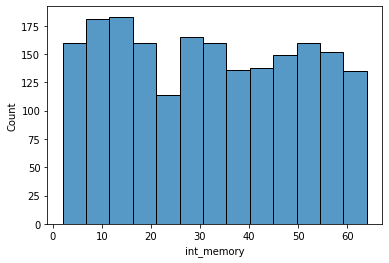

In [207]:
sbn.histplot(x="int_memory", data = df)
#Có thể thấy rằng lượng người dùng bộ nhớ phân phối khá đều, chỉ có trong khoảng 0-20 thì số lượng người dùng có vẻ nhỉnh hơn 1 xíu so với các khoảng còn lại

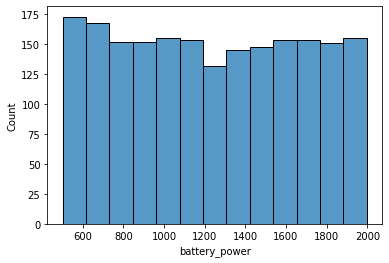

In [208]:
sbn.histplot(x="battery_power", data = df)
# Cũng như bộ nhớ, tổng năng lượng pin cũng được phân phối khá đều nhau và khoảng 0-800 là khoảng có số lượng nhiều hơn so một chút so với các khoảng còn lại

Text(0.5, 1.0, 'Ảnh hưởng của bộ nhớ đến mức giá')

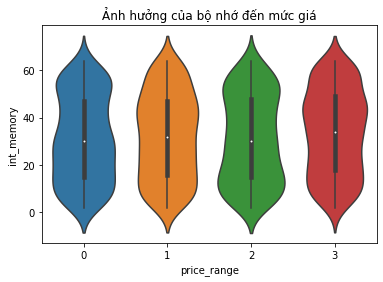

In [209]:
sbn.violinplot(y="int_memory", x="price_range", data=df)
plt.title('Ảnh hưởng của bộ nhớ đến mức giá')
# Có thể thấy rằng ở cả 4 mức độ, lượng bộ nhớ đều phân bổ khá đều nhau
# Điều này cho thấy rằng lượng bộ nhớ có thể không ảnh hưởng tới mức độ giá

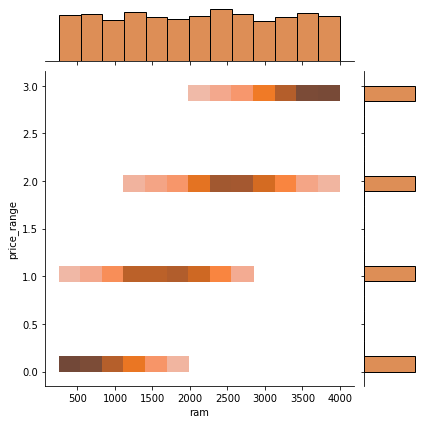

In [210]:
sbn.jointplot(x='ram',y='price_range',data=df,kind ='hist',color ='chocolate')
# Có thể thấy rằng ram ảnh hưởng khá nhiều tới mức độ phạm vi giá
# Ở mức độ 0 thì lượng ram hoàn toàn khá thấp( nhiều nhất là trong khoảng từ 500 tới 1000 và không vượt quá 2000)
# Sang tới mức độ 1 thì lượng ram sẽ có cải thiện hơn, lớn hơn so với mức độ 0(nhiều nhất trong khoảng 1000 tới 2500 và không vượt quá 3000)
# Tới mức độ 2 thì lại hơn so với mức 1(nhiều nhất nằm trong khoảng 2000 đến 3000)
# Tới mức độ 3 là mức độ mà lượng ram nhiều nhất trong tất cả các mức độ
# Từ đó có thể thấy rằng mức độ phạm vi giá càng tăng thì lượng ram cũng tăng lên hay nói cách khác ram và mức phạm vi giá có tương quan tuyến tính thuận

Text(0.5, 1.0, 'Ảnh hưởng của giá đến tổng năng lượng pin đến từng mức độ phạm vi giá')

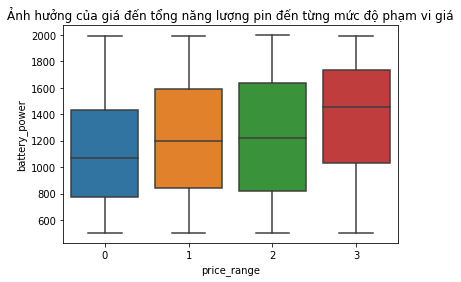

In [211]:
sbn.boxplot(x="price_range", y="battery_power", data=df)
plt.title('Ảnh hưởng của giá đến tổng năng lượng pin đến từng mức độ phạm vi giá')
# Có thể thấy ở cả 4 mức độ phạm vi đều không xuất hiện outlier
# Ở mức độ 0 mức năng lượng pin nằm trong khoảng từ 800 đến 1400
# Sang tới mức độ 1 mức năng lượng pin lớn hơn so với mức độ 0: nằm trong khoảng từ hơn 800 đến 1600
# Ở mức độ 2 mức năng lượng pin nhỉnh hơn một chút so với mức độ 1: nằm trong khoảng từ hơn 800 đến hơn 1600
# Tới mức độ 3 mức năng lượng pin hơn hoàn toàn so với 3 mức độ còn lại: nằm trong khoảng từ hơn 1000 đến 1700
# Từ đó nhóm em kết luận rằng mức năng lượng pin và phạm vi giá cũng có tương quan tuyến tính thuận

Text(0.5, 1.0, 'Tốc độ mà bộ vi xử lý thực hiện các hướng dẫn')

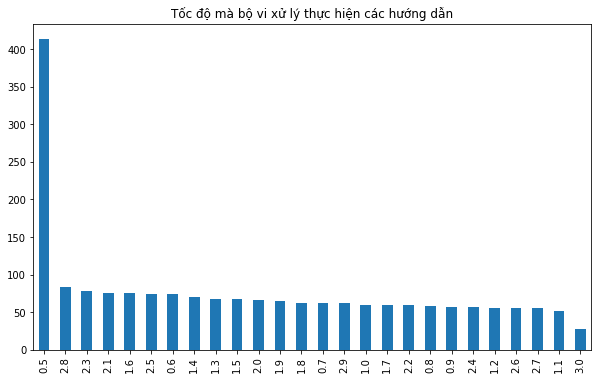

In [212]:
plt.figure(figsize=(10,6))
df['clock_speed'].value_counts().plot(kind='bar')
plt.title('Tốc độ mà bộ vi xử lý thực hiện các hướng dẫn')
# Có thể thấy rằng tốc độ mà bộ vi xử lý ở mức độ 0.5 là nhiều nhất, điều này cho thấy rằng tốc độ 0.5 là một tốc độ khá đại trà
# Sang tới các tốc độ khác thì phân phối khá đều nhau
# Chỉ có duy nhất tốc độ xử lý 3.0 thì ít hơn, điều này cho thấy rằng tốc độ xử lý 3.0 có thể hiếm hơn so với các mức độ khác

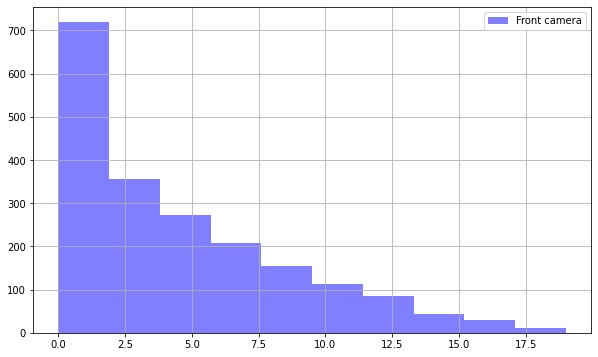

In [213]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
plt.legend()
plt.show()

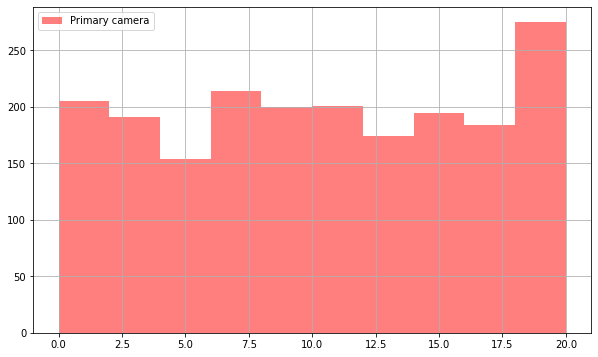

In [214]:
plt.figure(figsize=(10,6))
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
# Từ 2 hình trên nhóm em có thể kết luận rằng độ phân giải của cam chính hoàn toàn lớn hơn, thậm chí là lớn hơn rất nhiều so với cam trước

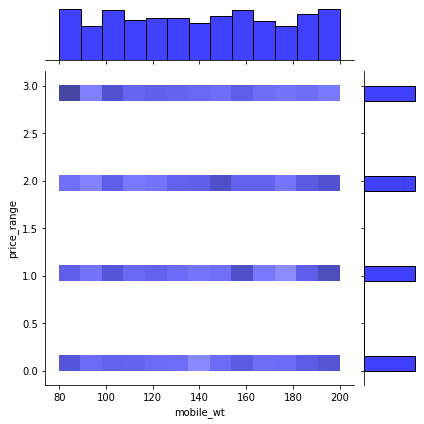

In [215]:
sbn.jointplot(x='mobile_wt',y='price_range',data=df,kind='hist',color='blue')
# Bằng mắt thường sau khi vẽ biểu đồ, nhóm em có thể kết luận rằng trọng lượng của điện thoại không ảnh hưởng đến mức độ phạm vi gi

## Thể hiện tương quan

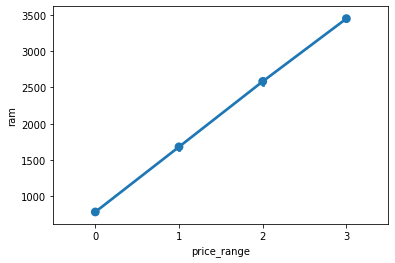

In [216]:
sbn.pointplot(y="ram", x="price_range", data=df) # mối tương quan giữa ram và price_range
plt.show()

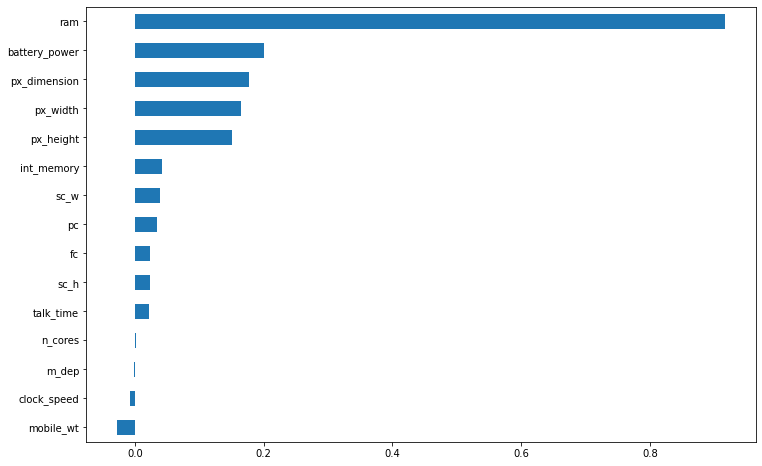

In [217]:
df.corr().price_range.sort_values()[:-1].plot(kind='barh', figsize = (12,8))
# mối tương quan giữa price_range và các biến

#  **Phân tích**

In [218]:
# Thống kê cơ bản (thông tin chung)
df.describe().T


,count,mean,std,min,25%,50%,75%,max
battery_power,1993.0,1238.240843,439.623414,501.0,851.0,1225.0,1615.0,1998.0
clock_speed,1993.0,1.522328,0.816010,0.5,0.7,1.5,2.2,3.0
fc,1993.0,4.307577,4.346816,0.0,1.0,3.0,7.0,19.0
int_memory,1993.0,32.037130,18.138956,2.0,16.0,32.0,48.0,64.0
m_dep,1993.0,0.501505,0.288462,0.1,0.2,0.5,0.8,1.0
mobile_wt,1993.0,140.186152,35.404518,80.0,109.0,141.0,170.0,200.0
n_cores,1993.0,4.518816,2.288168,1.0,3.0,4.0,7.0,8.0
pc,1993.0,9.906172,6.065798,0.0,5.0,10.0,15.0,20.0
px_height,1993.0,645.345208,443.798552,0.0,284.0,564.0,947.0,1960.0
px_width,1993.0,1251.767185,432.145064,500.0,876.0,1247.0,1633.0,1998.0


In [219]:
# Phân nhóm dựa trên NHIỀU thuộc tính: groupby
dfgb = df.groupby(by = ['price_range', 'three_g','touch_screen']) #'pandas.core.groupby.generic.DataGropBy'
df_gb =dfgb.size().reset_index(name = 'counts') #pandas.core.frame.DataFrame
print(df_gb)

    price_range three_g touch_screen  counts
0             0      no           no      63
1             0      no          yes      64
2             0     yes           no     173
3             0     yes          yes     198
4             1      no           no      57
5             1      no          yes      65
6             1     yes           no     181
7             1     yes          yes     194
8             2      no           no      60
9             2      no          yes      53
10            2     yes           no     205
11            2     yes          yes     182
12            3      no           no      63
13            3      no          yes      52
14            3     yes           no     187
15            3     yes          yes     196


In [220]:
# Tổng hợp trên TẤT CẢ các columns của dataframe
df_gb = df.groupby(by = ['blue']).mean() #pandas.core.frame.DataFrame
print(df_gb)


      battery_power  clock_speed        fc  int_memory     m_dep   mobile_wt  \
blue                                                                           
no      1233.187065     1.505274  4.294527   31.254726  0.499900  140.518408   
yes     1243.381579     1.539676  4.320850   32.832996  0.503138  139.848178   

       n_cores        pc   px_height     px_width          ram       sc_h  \
blue                                                                        
no    4.434826  9.964179  649.066667  1269.423881  2096.376119  12.308458   
yes   4.604251  9.847166  641.559717  1233.806680  2155.253036  12.293522   

          sc_w  talk_time  price_range   px_dimension  
blue                                                   
no    5.778109  10.958209     1.476617  919388.793035  
yes   5.772267  11.076923     1.525304  891994.871457  


# **Phân tích đa biến**
Hypothesis Testing,
ANOVA (ANalysis Of VAriance)

In [221]:
# kiểm định phương sai chiều cao và độ rộng của px
#    H0: Muy['px_height'] =  Muy['px_width']                
#    Ha: Muy['px_height'] #  Muy['px_width']

height1 = df['px_height'].values
height = np.array(list(map(np.int_, height1)))
width  = df['px_width'].values
print(f'Var(life_1) = {height.var()}, Var(life_2) = {width.var():.2f}')
print('==> Phương sai 2 mẫu', 'BẰNG NHAU' if (height.var() == width.var()) else 'KHÁC NHAU')  

Var(life_1) = 196858.33040478601, Var(life_2) = 186655.65
==> Phương sai 2 mẫu KHÁC NHAU


In [222]:
alpha            = .05
confidence_level = 1 - alpha

In [223]:
from scipy.stats import ttest_ind
len_height   = len(height) - 1
t, p = ttest_ind(height, width, equal_var = False)

In [224]:
import scipy.stats as stats
cv = stats.t.ppf(confidence_level, len_height)
print(f'Giá trị tới hạn = {cv:.2f}; Trị thống kê t = {t:2f}')

if (abs(t) >= cv):
    print('Vì trị thống kê t NẰM TRONG miền bác bỏ cho nên BÁC BỎ H0 ==> Muy[''px_height''] #  Muy[''px_width'']')
else:
    print('Vì trị thống kê t NẰM NGOÀI miền bác bỏ cho nên KHÔNG BÁC BỎ H0 ==> H0: Muy[''px_height''] =  Muy[''px_width'']')

Giá trị tới hạn = 1.65; Trị thống kê t = -43.704786
Vì trị thống kê t NẰM TRONG miền bác bỏ cho nên BÁC BỎ H0 ==> Muy[px_height] #  Muy[px_width]


In [225]:
fc = df['fc'].values
pc = df['pc'].values
fc1 = np.array(list(map(np.int_, fc)))
pc1 = np.array(list(map(np.int_, pc)))

In [226]:
## Các giả thuyết kiểm định                  
##    H0: Muy[fc] = Muy[pc]                  
##    Ha: Có sự khác biệt giữa các cam trước và cam chính  
import scipy.stats as stats
f, p = stats.f_oneway(fc1, pc1)
alpha = .05
## Kết luận theo phương pháp p-value (trị số p)
print(f'Trị số p = {p:.2f}, alpha = {alpha:.2f}')

if (p < alpha):
    print('Trị số p < alpha cho nên bác bỏ H0 ==> hậu kiểm Tukey HSD')
else:
    print('KHÔNG bác bỏ H0 ==> Muy[fc] = Muy[pc](sự ĐỘC LẬP)')
# Từ đó nhóm em kết luận được rằng: không có sự khác biệt giữa 2 cam, tức là nói một cách đơn giản là trung bình giữa cam trước và cam chính của các máy là giống nhau
# Nhưng 2 cam này hoàn toàn không có mối liên hệ với nhau, tức là cam trước có bị vấn đề gì thì cũng không quá ảnh hưởng tới cam chính và ngược lại

Trị số p = 0.00, alpha = 0.05
Trị số p < alpha cho nên bác bỏ H0 ==> hậu kiểm Tukey HSD


In [227]:
# Kiểm định z
# H0: Muy_babattery_power <= 1250
# Ha: Muy_babattery_power > 1250
import math
alpha = .05
x = df['battery_power'].mean()
dolechchuan = df['battery_power'].std()
n = len(df['battery_power'])
z= (x - 1250)/(dolechchuan/math.sqrt(n))
def zDistribution(side, lower, upper):
    import scipy.stats as st

    side = side.lower()
    
    if (side == 'left'):
        p = st.norm.cdf(lower)
    elif (side == 'right'):
        p = 1 - st.norm.cdf(upper)
    else:
        p = st.norm.cdf(upper) - st.norm.cdf(lower)       
    return (p)

## Hàm hiển thị xác suất
def displayZ(side, lower, upper, p):
    side = side.lower()
    lower = str(lower)
    upper = str(upper)
    if (side == 'left'):
        s = 'P(Z < ' + lower + ') = '
    elif (side == 'right'):
        s = 'P(' + upper + ' < Z) = '
    else:
        s = 'P(' + lower + ' < Z < ' + upper + ') = '
    return (s + str('%.4f' %p))    
side  = 'right'
lower = None
upper = z
p = zDistribution(side, lower, upper)
print(displayZ(side, lower, upper, p))
if (p < alpha):
  print('Bác bỏ H0')
else:
  print('Chấp nhận H0')


P(-1.1941228955538912 < Z) = 0.8838
Chấp nhận H0


# **PCA**


In [228]:
df =  pd.get_dummies(df)
y = list(df['price_range'])
X = df.drop(['price_range','px_dimension'],axis=1)
X

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,dual_sim_no,dual_sim_yes,four_g_no,four_g_yes,three_g_no,three_g_yes,touch_screen_no,touch_screen_yes,wifi_no,wifi_yes
0,842,2.2,1,7,0.6,188,2,2.0,20.0,756,...,1,0,1,0,1,0,1,0,0,1
1,1021,0.5,0,53,0.7,136,3,6.0,905.0,1988,...,0,1,0,1,0,1,0,1,1,0
2,563,0.5,2,41,0.9,145,5,6.0,1263.0,1716,...,0,1,0,1,0,1,0,1,1,0
3,615,2.5,0,10,0.8,131,6,9.0,1216.0,1786,...,1,0,1,0,0,1,1,0,1,0
4,1821,1.2,13,44,0.6,141,2,14.0,1208.0,1212,...,1,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14.0,1222.0,1890,...,0,1,0,1,0,1,0,1,1,0
1996,1965,2.6,0,39,0.2,187,4,3.0,915.0,1965,...,0,1,1,0,0,1,0,1,0,1
1997,1911,0.9,1,36,0.7,108,8,3.0,868.0,1632,...,0,1,0,1,0,1,0,1,1,0
1998,1512,0.9,4,46,0.1,145,5,5.0,336.0,670,...,1,0,0,1,0,1,0,1,0,1


In [229]:
X.shape

(1993, 26)

In [230]:
pca = PCA(n_components=4)
pca.fit(X)

PCA(n_components=4)

In [231]:
pca.components_.shape

(4, 26)

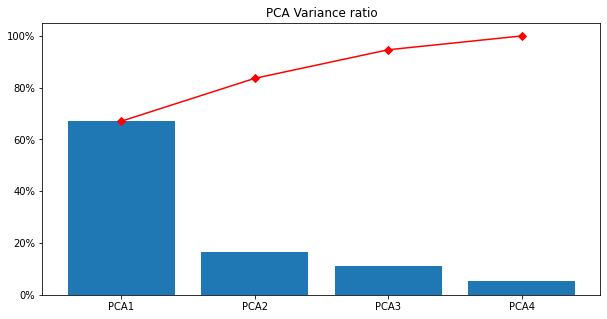

In [232]:

variance_ratio_cumul = list(pca.explained_variance_ratio_.cumsum() * 100)
variance_ratio = list(pca.explained_variance_ratio_ * 100)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot([f"PCA{i}" for i in range(1,len(variance_ratio_cumul)+1)], variance_ratio_cumul, "r", marker="D", label="Variance ratio cumul")
plt.bar(range(len(variance_ratio_cumul)), variance_ratio, label="Variance ratio")
plt.title("PCA Variance ratio")
ax.yaxis.set_major_formatter(PercentFormatter())
plt.show()

# để lấy được ~100% thông tin dữ liệu thì cần dùng từ 4 features

In [233]:
X_pca = pca.transform(X)

df_pca = pd.DataFrame(X_pca, columns=['PC 1','PC 2','PC 3','PC 4'])
df_pca['price_range'] = y
df_pca

,PC 1,PC 2,PC 3,PC 4,price_range
0,428.923059,-795.371636,-391.587768,56.546944,1
1,503.710962,696.569301,-232.920260,344.859751,2
2,472.410578,765.078638,-678.109412,-112.090537,2
3,638.852022,780.625463,-628.612370,-28.562571,2
4,-719.967620,380.879197,591.407734,-393.939618,1
...,...,...,...,...,...
1988,-1462.113665,845.152495,-453.646187,62.426556,0
1989,-95.788637,691.820032,711.061953,353.473637,2
1990,929.359604,434.295278,665.979778,135.868990,3
1991,-1254.237601,-630.386607,284.055066,-191.933613,0


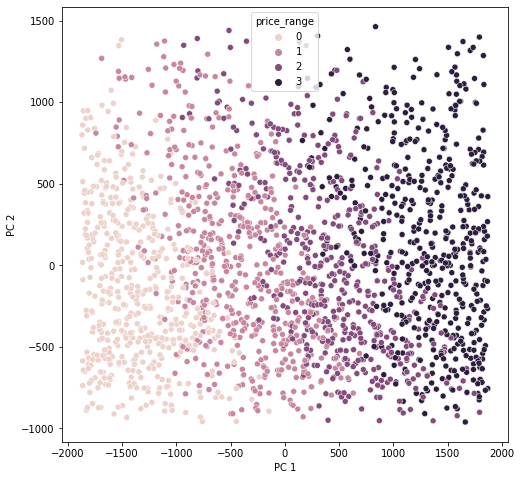

In [234]:
plt.figure(figsize = (8, 8))
sbn.scatterplot(x = "PC 1", y = "PC 2", data = df_pca, hue = 'price_range')
plt.show()

# **Machine learning**

In [235]:
X=  df_pca.drop('price_range',axis=1)
y = df_pca['price_range']

In [236]:
# Bắt đầu lấy mẫu phân tầng
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state= 42)

k = 10 cho ra kết quả tốt nhất 0.9573934837092731 


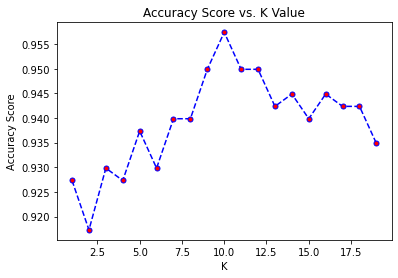

In [237]:
#KNeighborsRegressor

accuracy_knn = []

for i in range(1,20):
  model_KN = KNeighborsClassifier(n_neighbors=i)
  model_KN.fit(X_train,y_train)
  y_pred = model_KN.predict(X_test)
  accuracy_knn.append(accuracy_score(y_test, y_pred))

print(f'k = {accuracy_knn.index(max(accuracy_knn))+1} cho ra kết quả tốt nhất {max(accuracy_knn)} ')

plt.plot(range(1,20),accuracy_knn,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Accuracy Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.show()

In [238]:
#Logistic
model_LG = LogisticRegression()
model_LG.fit(X_train,y_train)
y_pred = model_LG.predict(X_test)


print('Accuracy score:',accuracy_score(y_test, y_pred))

Accuracy score: 0.9348370927318296


In [239]:
#svc
model_SVC = SVC()
model_SVC.fit(X_train,y_train)
y_pred = model_SVC.predict(X_test)

print('Accuracy score:',accuracy_score(y_test, y_pred))




Accuracy score: 0.9598997493734336


In [240]:
# Decision tree
model_dec = DecisionTreeClassifier()
dTree = model_dec.fit(X_train, y_train)
y_pred = dTree.predict(X_test)

print('Accuracy score:',accuracy_score(y_test, y_pred))

Accuracy score: 0.8922305764411027


In [241]:
df_SVC = pd.DataFrame({'label': y_test, 'predict_label': y_pred})
df_SVC

,label,predict_label
889,2,2
1672,3,3
414,2,2
1599,1,1
849,2,2
...,...,...
909,0,0
261,1,1
576,0,0
963,1,1
